#  Diagnosis of breast cancer cells

The implementation of our machine learning technique to our dataset has taken course over 5 stages, namely library imports and data retrival, cleaning the data, grouping the data and exploring correlation, training the model and comparing model results.

## Library imports and Data retrival

In this stage of our implementation we import all the required libaries that will provide us with the relevenant functions to clean, trait and test our dataset inaddition to visualizing our results.

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import confusion_matrix
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
from sklearn.metrics import accuracy_score
from sklearn.metrics import plot_confusion_matrix

We retrive our data and place it into a dataframe using the (pd.read_csv) function. This will allow us to work with and manipulate our data.

In [2]:
df = pd.read_csv("data.csv")

In [3]:
df.head()

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,...,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst,Unnamed: 32
0,842302,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,...,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890,NaN
1,842517,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,...,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902,NaN
2,84300903,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,...,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758,NaN
3,84348301,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,...,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300,NaN
4,84358402,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,...,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678,NaN


## Cleaning the data

In this stage we go through our dataframe and perform cleaning or cleansing of the data to prepare it for model training. Cleaning the data refers to the process of removing redudant or duplicate data records within our dataset. The removal of outdated data or data records that may contain errors. This is a very essential stage or step in our implemenation as if our data is not clean it can impact the accuracy of the predicted value of our model. In our dataset we have removed the cloumns 'id' and 'unamed: 32' as they contain redudandent data that will not aid in training the model to produce accurate predictions. Furthermore we remap the values in the diagnosis from char values 'M' and 'N' to the integer values 1 and 0 respectively such that a correlation matrix can be calculated in the next stage.

In [4]:
# Dropping the id column

In [5]:
df = df.drop(columns='id', axis = 1)

In [6]:
# Dropping the unnamed column

In [7]:
df = df.drop(columns='Unnamed: 32', axis = 1)

In [8]:
df.head()

,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
0,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,...,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
1,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,...,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
2,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,...,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758
3,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,...,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300
4,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,...,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678


In [9]:
# Mapping the diagnosis values M and B as 1 and 0 respectivly

In [10]:
df['diagnosis'] = df['diagnosis'].map({'M':1, 'B':0})

## Grouping input variables and exploring correlations

In this stage of the implementation we group the input data based on thier column features. We divided our dataset in three groups namely: mean features, standrad error features and worst features. we splits the data from their respective columns and append them into three separate lists. We use these separate lists in order to initialize a correlation matrix that will help us identify the variables that correlate the most with our diagnosis data records in our dataset. The selected varaibles will then be used to train our model.

In [11]:
# Grouping all the data by the type of mean, standard error and worst features

In [12]:
mean_features = list(df.columns[1:11])
se_features = list(df.columns[11:21])
worst_features = list(df.columns[21:31])

In [13]:
# Appending diagnosis to do them such that a correlation can be calculated.

In [14]:
mean_features.append('diagnosis')
se_features.append('diagnosis')
worst_features.append('diagnosis')

In [15]:
# Creating a correlation matrix for our grouped data

In [16]:
corr = df[mean_features].corr()
corr

,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,fractal_dimension_mean,diagnosis
radius_mean,1.000000,0.323782,0.997855,0.987357,0.170581,0.506124,0.676764,0.822529,0.147741,-0.311631,0.730029
texture_mean,0.323782,1.000000,0.329533,0.321086,-0.023389,0.236702,0.302418,0.293464,0.071401,-0.076437,0.415185
perimeter_mean,0.997855,0.329533,1.000000,0.986507,0.207278,0.556936,0.716136,0.850977,0.183027,-0.261477,0.742636
area_mean,0.987357,0.321086,0.986507,1.000000,0.177028,0.498502,0.685983,0.823269,0.151293,-0.283110,0.708984
smoothness_mean,0.170581,-0.023389,0.207278,0.177028,1.000000,0.659123,0.521984,0.553695,0.557775,0.584792,0.358560
compactness_mean,0.506124,0.236702,0.556936,0.498502,0.659123,1.000000,0.883121,0.831135,0.602641,0.565369,0.596534
concavity_mean,0.676764,0.302418,0.716136,0.685983,0.521984,0.883121,1.000000,0.921391,0.500667,0.336783,0.696360
concave points_mean,0.822529,0.293464,0.850977,0.823269,0.553695,0.831135,0.921391,1.000000,0.462497,0.166917,0.776614
symmetry_mean,0.147741,0.071401,0.183027,0.151293,0.557775,0.602641,0.500667,0.462497,1.000000,0.479921,0.330499
fractal_dimension_mean,-0.311631,-0.076437,-0.261477,-0.283110,0.584792,0.565369,0.336783,0.166917,0.479921,1.000000,-0.012838


In [17]:
corr = df[se_features].corr()
corr

,radius_se,texture_se,perimeter_se,area_se,smoothness_se,compactness_se,concavity_se,concave points_se,symmetry_se,fractal_dimension_se,diagnosis
radius_se,1.000000,0.213247,0.972794,0.951830,0.164514,0.356065,0.332358,0.513346,0.240567,0.227754,0.567134
texture_se,0.213247,1.000000,0.223171,0.111567,0.397243,0.231700,0.194998,0.230283,0.411621,0.279723,-0.008303
perimeter_se,0.972794,0.223171,1.000000,0.937655,0.151075,0.416322,0.362482,0.556264,0.266487,0.244143,0.556141
area_se,0.951830,0.111567,0.937655,1.000000,0.075150,0.284840,0.270895,0.415730,0.134109,0.127071,0.548236
smoothness_se,0.164514,0.397243,0.151075,0.075150,1.000000,0.336696,0.268685,0.328429,0.413506,0.427374,-0.067016
compactness_se,0.356065,0.231700,0.416322,0.284840,0.336696,1.000000,0.801268,0.744083,0.394713,0.803269,0.292999
concavity_se,0.332358,0.194998,0.362482,0.270895,0.268685,0.801268,1.000000,0.771804,0.309429,0.727372,0.253730
concave points_se,0.513346,0.230283,0.556264,0.415730,0.328429,0.744083,0.771804,1.000000,0.312780,0.611044,0.408042
symmetry_se,0.240567,0.411621,0.266487,0.134109,0.413506,0.394713,0.309429,0.312780,1.000000,0.369078,-0.006522
fractal_dimension_se,0.227754,0.279723,0.244143,0.127071,0.427374,0.803269,0.727372,0.611044,0.369078,1.000000,0.077972


In [18]:
corr = df[worst_features].corr()
corr

,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst,diagnosis
radius_worst,1.000000,0.359921,0.993708,0.984015,0.216574,0.475820,0.573975,0.787424,0.243529,0.093492,0.776454
texture_worst,0.359921,1.000000,0.365098,0.345842,0.225429,0.360832,0.368366,0.359755,0.233027,0.219122,0.456903
perimeter_worst,0.993708,0.365098,1.000000,0.977578,0.236775,0.529408,0.618344,0.816322,0.269493,0.138957,0.782914
area_worst,0.984015,0.345842,0.977578,1.000000,0.209145,0.438296,0.543331,0.747419,0.209146,0.079647,0.733825
smoothness_worst,0.216574,0.225429,0.236775,0.209145,1.000000,0.568187,0.518523,0.547691,0.493838,0.617624,0.421465
compactness_worst,0.475820,0.360832,0.529408,0.438296,0.568187,1.000000,0.892261,0.801080,0.614441,0.810455,0.590998
concavity_worst,0.573975,0.368366,0.618344,0.543331,0.518523,0.892261,1.000000,0.855434,0.532520,0.686511,0.659610
concave points_worst,0.787424,0.359755,0.816322,0.747419,0.547691,0.801080,0.855434,1.000000,0.502528,0.511114,0.793566
symmetry_worst,0.243529,0.233027,0.269493,0.209146,0.493838,0.614441,0.532520,0.502528,1.000000,0.537848,0.416294
fractal_dimension_worst,0.093492,0.219122,0.138957,0.079647,0.617624,0.810455,0.686511,0.511114,0.537848,1.000000,0.323872


In [19]:
# We can use the correlation matrix to identify the different varible that we should use in our model

In [20]:
prediction_vars = ['radius_mean', 'perimeter_mean','area_mean','compactness_mean','concavity_mean',
                  'concave points_mean','radius_se', 'radius_worst', 'perimeter_worst', 'area_worst', 'compactness_worst']

After observing the correlation values from our correlation matrixs we have identified these variables to have the highest correlation to the data in the diagnosis column. It is important to note that not all the variables with high correlation have been selected, as that might cause our model to become overfitted and as a result affect the outputs of the model.

# Training the Model

### Spliting the dataset into train and test

Now that we have cleaned our data, selected the variables with the highest correlation to the diagnosis column, we can begin to initalize, train and test our models. For this dataset we have selected to implement two machine learning techniques K nearest neighbour and decision tree. Firstly we must split our dataset in two paritions one that will be labelled where the dianosis is included to help train our model and another to test our model. The dataset will be split with 0.15 ratio where 15% of the original dataset will be used for testing and the other 85% will be used to train the model. We initalize our x values as the selected variables for our prediction and our y values as the corresponding diagnosis for those data records.

In [21]:
train, test = train_test_split(df, test_size = 0.15, random_state=1)

In [22]:
train_x = train[prediction_vars]
train_y = train['diagnosis']
test_x = test[prediction_vars]
test_y = test['diagnosis']

## K Nearest Neighbour 

We start off by initializing our KNN model by calling the KNeighborsClassifier function from the sklearn library. This function will taken our train data as parameters and return a predicted set of y values from our test data using the K Nearest Neighbour classification technique. After we have initalized our model we fit our input x and y values that we have initalized during the train test split into our model. The model will then study and observe the patterns and correlations between our x and y values in our gain a better understanding of the data set and make more precise and accaurate predictions. Once fitted, we then predict y values using the model by providing our test x values as input. Using the output provided from the model we then build a confusion matrix, which is a matrix that helps us evaluate the perfomance of our model. Furthermore, based on the results provided by the model we calculate a pericsion, recall and accuracy score that will help us gage how well our model is performaning currently.

In [23]:
#Initializing a KNN Model
modelKNN = KNeighborsClassifier()

In [24]:
#Fitting the data into the model
modelKNN.fit(train_x, train_y)

KNeighborsClassifier()

In [25]:
#Predicting y value using the test x data
predictionsKNN = modelKNN.predict(test_x)

In [26]:
#initalizing a confusion matrix
matrixKNN = confusion_matrix(test_y, predictionsKNN, labels=[0,1])

In [27]:
#Calculating the precision, recall and accuracy

precision_KNN = precision_score(test_y, predictionsKNN)
recall_KNN = recall_score(test_y, predictionsKNN)
accuracy_KNN = accuracy_score(test_y, predictionsKNN)


## Decision Tree

The same approach can be taken to initalize, train and test our Decision Tree machine learning model. The key difference is the function that is called when intializing model. it is important to highlight that our decision tree model take in three parameters: Cirterion which is a set of conditions or crietira by which the nodes our decision are selected when looking for the optimum split of features, max_depth which is the maximum depth of each decision tree in our model and random_state which controlls the randomness at which features are selected before each split.

In [28]:
#Initializing a Decision Tree Model
DecisionTreeModel =  DecisionTreeClassifier(criterion='entropy',max_depth=3,random_state=33)

In [29]:
#Fitting the data into the model
DecisionTreeModel.fit(train_x, train_y)

DecisionTreeClassifier(criterion='entropy', max_depth=3, random_state=33)

In [30]:
#Predicting y value using the test x data
predictionsDecisionTree = DecisionTreeModel.predict(test_x)

In [31]:
#initalizing a confusion matrix
matrixDT = confusion_matrix(test_y, predictionsDecisionTree, labels=[0,1])

In [32]:
#Calculating the precision, recall and accuracy

precision_DecisionTree = precision_score(test_y, predictionsDecisionTree)
recall_DecisionTree = recall_score(test_y, predictionsDecisionTree)
accuracy_DecisionTree = accuracy_score(test_y, predictionsDecisionTree)

## Comparing the model results

In [33]:
models=['Decision Tree', 'K Nearest Neighbour']
prec = [precision_DecisionTree,precision_KNN]
acc = [accuracy_DecisionTree, accuracy_KNN]
rec = [recall_DecisionTree,recall_KNN]

In [34]:
data = zip(models,acc, prec, rec)

In [35]:
result = pd.DataFrame(data,columns=['Model','Accuracy','Precision','Recall']).sort_values(["Accuracy"], ascending = False)

In [36]:
result

,Model,Accuracy,Precision,Recall
1,K Nearest Neighbour,0.953488,0.96875,0.911765
0,Decision Tree,0.918605,1.00000,0.794118


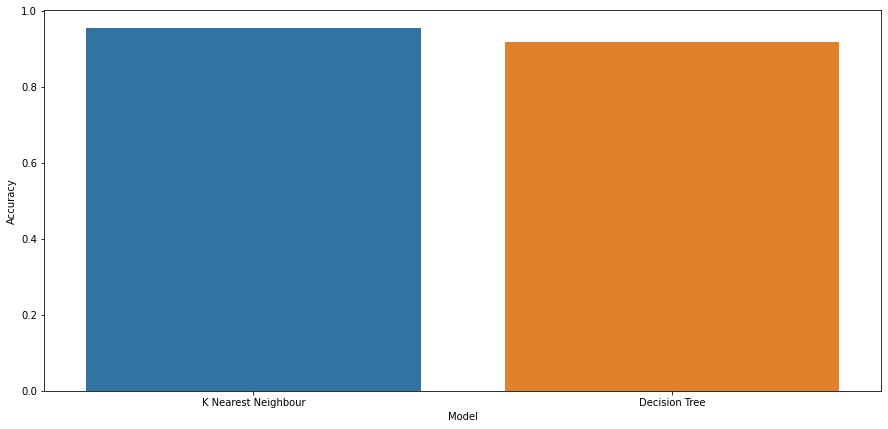

In [37]:
plt.figure(figsize=(15,7))
sns.barplot(x = "Model", y = "Accuracy", data = result)
plt.show()

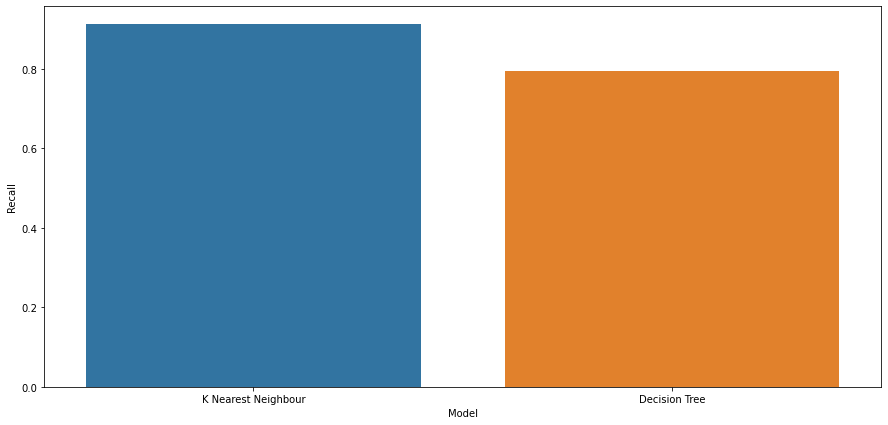

In [38]:
plt.figure(figsize=(15,7))
sns.barplot(x = "Model", y = "Recall", data = result)
plt.show()

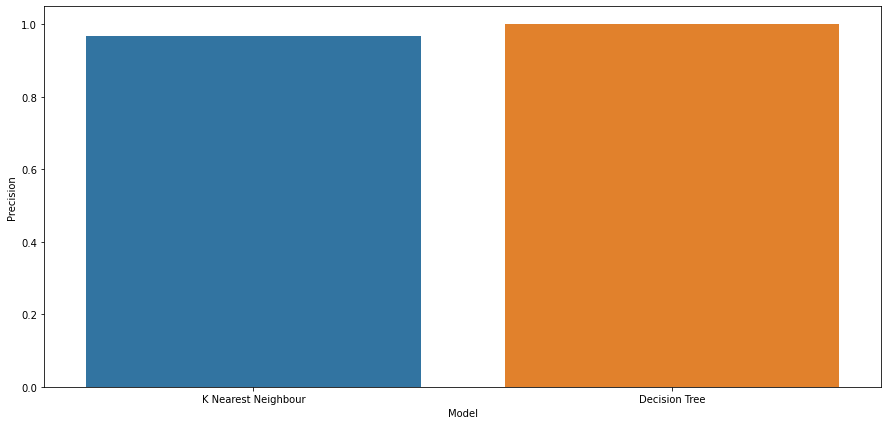

In [39]:
plt.figure(figsize=(15,7))
sns.barplot(x = "Model", y = "Precision", data = result)
plt.show()

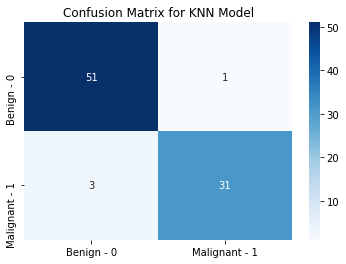

In [40]:
# Plot non-normalized confusion matrix for KNN model
cat = ['Benign - 0', 'Malignant - 1']
ax = plt.axes()
ax.set_title('Confusion Matrix for KNN Model')
sns.heatmap(matrixKNN,  annot=True, xticklabels= cat ,yticklabels= cat,  cmap='Blues', ax = ax)

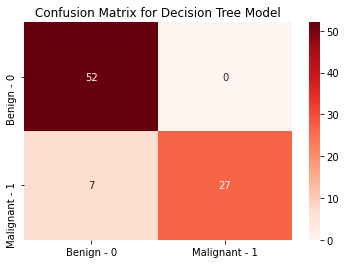

In [41]:
# Plot non-normalized confusion matrix for Decision Tree model
ax2 = plt.axes()
ax2.set_title('Confusion Matrix for Decision Tree Model')
sns.heatmap(matrixDT, annot=True, xticklabels= cat ,yticklabels= cat,  cmap='Reds', ax = ax2)

## Discussion

Based on the results we have gathered we can now compare the performance of both our models and identify how accurantly they we are able to predict the y values after training. We will be comparing the three metrics that we have calculated for both models and identify which model performed better. Before taking a deeper dive into the results lets first get a better understanding of the metrics we have calculated. Firstly, we have the percision of the models which refers to the proportion of the positive identification that was actually correct. In this scenario it would be the number of malignant tumors that were prediticed correctly by our models. Secondly, we have the recall of the models which refers to the proportions of the actual positives that were identified correctly. In this scenerio it would be the percentage of all maliganat tumors that the models identify. Thirdly, we have the accuracy of the models which refers to the measure of correct predictions that the models have made. Based on these definitions we can now proceed to compare our models, when observing the accuracy of both models we can see that the K Neares Neighbours has an overall higher accuracy and recall where as the decision tree model had a higher precision. On closer inspection of the confusion matrices of both models we can see that the KNN model predicted 53 tumors as benign in which only one was a false negative compared to the 52 tumors predicted as bening in the decision tree model with 0 false negative predictions. Furthermore, we can observe that the KNN model predicted 33 tumors as malignant in which only 3 were false positve comapred to the 34 tumors predicted as malignant in the decision tree model with 7 false negative predictions. Overall we can conclude that the K Nearest Negihbour model had the better performance as while it had greater false negative predictions it was able to get identify significantly higher malignant tumors and had significantly fewer false negative predictions.